# Superstore Sales Dataset
#### Predict Sales using Time Series

    Memprediksi penjualan produk di masa depan membantu bisnis mengelola biaya produksi dan iklan produk. Masih banyak lagi manfaat memprediksi penjualan suatu produk di masa depan.

    Analisis Time series berkaitan dengan data berbasis time series untuk mengekstrak pola prediksi dan karakteristik data lainnya. Ini menggunakan model untuk meramalkan nilai masa depan dalam kerangka waktu kecil berdasarkan pengamatan sebelumnya. Ini banyak digunakan untuk data non-stasioner, seperti data ekonomi, data cuaca, harga saham, dan peramalan penjualan ritel.

    Dataset yang diberikan di sini berisi data tentang penjualan produk Retail dataset global superstore selama 4 tahun di Negara USA 

## Data Understanding

1. data dari  2015-01-02 sampai 2018-12-30

2. data didownload di kaggle ; https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

3. data dictionary : 
        1. Order ID : Id order 
        2. Order date : Tanggal pemesanan barang
        3. Ship Date : Tanggal pengiriman barang yang telah dipesan
        4. Ship Mode : Jenis pengiriman
        5. Customer ID : Id pelanggan
        6. Customer Name : Nama pelanggan
        7. Segment : Jenis pelanggan
        8. Country : Negara pelanggan
        9. City : Kota Pelanggan
        10. State : kota bagian pelanggan
        11. Region : Wilayah pelanggan
        12. Product ID : Id barang
        13. Category : Kategori barang
        14. Sub-Category : sub kategori barang
        15. Product Name : Nama produk/barang
        16. Sales : Penjualan dalam $

## Data Preparation

#### Import Library

In [38]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load Dataset

In [39]:
df = pd.read_csv('train.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


#### Getting info from the data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Berdasarkan info : 

    1. terdapat 9800 baris dan 16 fitur
    2. terdapat 15 data object dan 1 data numerical
    3. data `date` perlu diubah ke tipe datetime 

#### Data Cleansing

In [41]:
df.isna().sum() / len(df) * 100

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64

Observation :

 terdapat missing value pada `Postal Code` sebanyak 11%, namun hal itu disebabkan karna pada `State` Vermont tidak memiliki postal code. Dapat di handle

In [42]:
#convert datetime datatype (feature engginering)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

## EDA

In [43]:
#split kolom berdasarkan segmen
user = ['Customer ID','Customer Name','Segment','Country','City','State','Region']
product = ['Product ID','Category','Sub-Category','Product Name']
ship = ['Order ID','Order Date','Ship Date','Ship Mode']
target = ['Sales']

In [44]:
df[user].describe()

,Customer ID,Customer Name,Segment,Country,City,State,Region
count,9800,9800,9800,9800,9800,9800,9800
unique,793,793,3,1,529,49,4
top,WB-21850,William Brown,Consumer,United States,New York City,California,West
freq,35,35,5101,9800,891,1946,3140


Observation :
1. Berdarkan kolom `Customer ID` dan `Customer Name` terdapat 793 pelanggan yang telah membeli produk di superstore
dengan William Brown sebagai pembeli terbanyak dengan 35 produk
2. Berdasarkan kolom `Segment` pembagian jenis pelanggan di bagi 3, yaitu Consumer, corporate dan Home office. Consumer pribadi menjadi segmen terbanyak yang membeli produk dengan 5101
3. Berdasarkan kolom `Country`,`City`,`State`,`Region` mayoritas pembelian pada kota New york, negara bagian california

In [45]:
df[product].describe()

,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800
unique,1861,3,17,1849
top,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,19,5909,1492,47


Observation :
1. Pada Superstore, terdapata 1861 jenis barang yang terjual
2. Berdasarkan kolom `Category` terdapat 3 jenis katergori, yaitu furniture, persediaan kantor dan tekhnologi dengan alat kanotr menjadi penjualan terbanyak dengan 5909 produk
3. Berdasarkan kolom `Sub Category` terdapat 17 jenis, yaitu Bookcases, Chairs, Labels,Tables,Storage,Furnishings,Art, Phones, Binders, Appliances, Paper,Accessories, Envelopes,Fasteners,Supplies,Machines,Copiers. Dengan penjualn terbanyak pada jenis binder sebanyak 1492

In [46]:
df[ship].describe()

,Order ID,Order Date,Ship Date,Ship Mode
count,9800,9800,9800,9800
unique,4922,1230,1326,4
top,CA-2018-100111,2017-05-09 00:00:00,2018-09-26 00:00:00,Standard Class
freq,14,38,34,5859
first,NaN,2015-01-02 00:00:00,2015-01-04 00:00:00,NaN
last,NaN,2018-12-30 00:00:00,2019-05-01 00:00:00,NaN


Observation :
1. Berdasarkan kolom `Order Id` terdapat 4922 transkasi yang telah terjadi pada superstore
2. Berdasarkan Kolom `Order Date` pada tanggal 5/9/2017 menjadi penjualan terramai dengan 38 produk dalam 1 hari
3. Berdasarkan Kolom `Ship Date` pada tanggal 26/9/2018 menjadi pengiriman terramai dengan 384produk dalam 1 hari
4. Berdasarkan kolom `Ship Mode` Hampir lebih dari 50% pelanggan lebih memilih standrand class untuk melakukan pengiriman

In [47]:
df[target].describe()

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


Observation : 
1. Mean lebih besar daripada Median, menandkan data distribusi secara positive skewed
2. rata-rata penjualan Superstore sebanyak 230 dollar
3. Penjualan tertinggi sebanyak 22638 dollar dan terendah sebanyak 0.44 dollar

#### Univariate Analyis

<AxesSubplot:xlabel='Sales'>

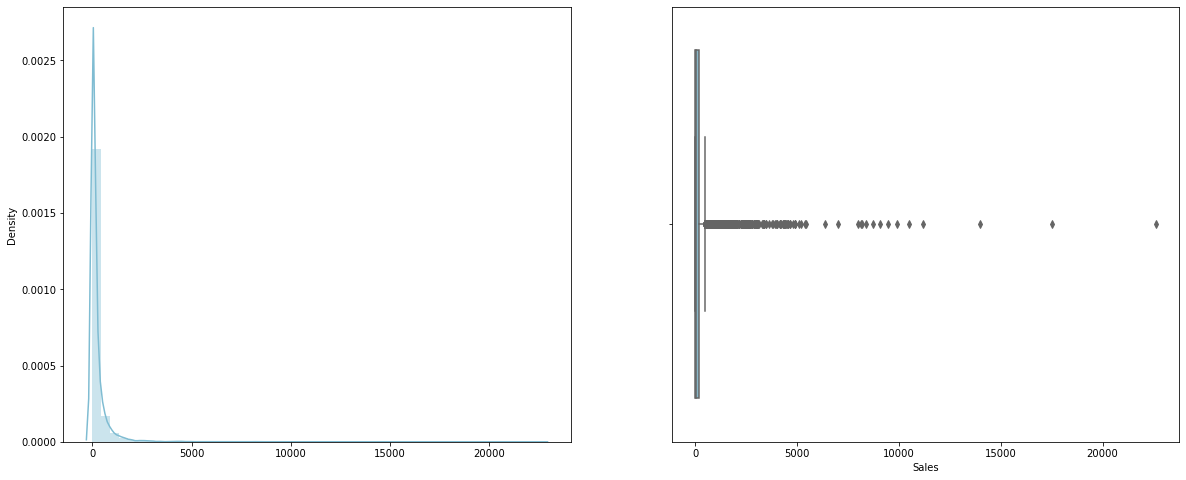

In [48]:
fig, axes = plt.subplots(1,2, figsize=(20,8))

sns.distplot(ax=axes[0],x=df['Sales'], color='#7FBCD2')
sns.boxplot(ax=axes[1],x=df['Sales'], color='#7FBCD2')

Observation :
1. Berdasarkan grafik 1, terlihat distribusi data mengalami Positive skewed. Penjualanan menumpuk pada <2500 dollar
2. Berdasarkan boxplot, terdapat sangat banyak outlier, perlu di handle lebih lanjut

Untuk handiling outlier, menggunakan metode IQR akan men-drop value, sedangkan ingin menggunakan semua data tanpa membuang suatu value. Jadi dilakukan log tranformation

In [49]:
df['Log_Of_sales'] = [np.log(x) for x in df['Sales']]

#### Tipe segmen dan Shiping

In [50]:
#create percentage for barplot
def percent_data(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

In [52]:
df['year_order'] = df['Order Date'].dt.year
df['year_ship'] = df['Ship Date'].dt.year

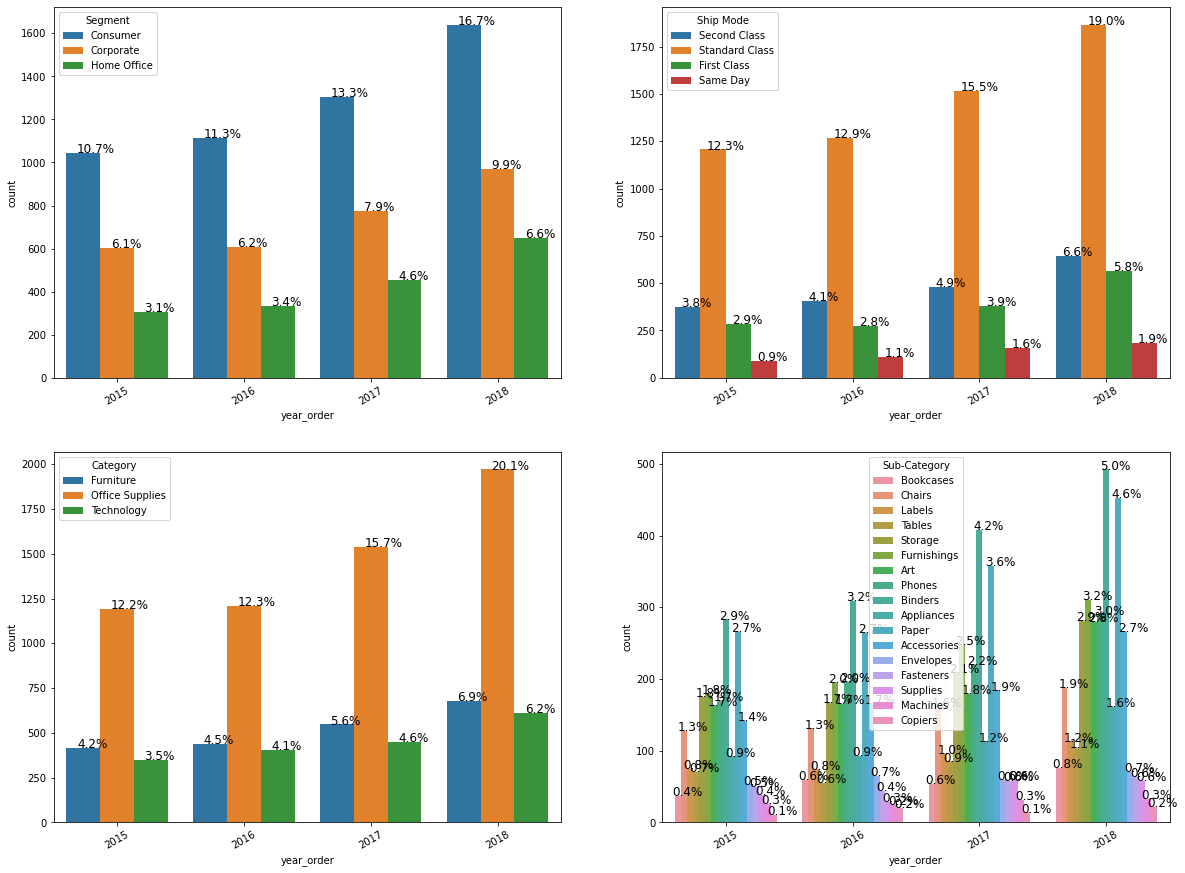

In [64]:
tipe1 = ['Segment','Ship Mode','Category','Sub-Category']

plt.figure(figsize=(20,15))

for i,col in enumerate(tipe1):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = df['year_order'],hue=df[col])
    ax.tick_params(axis='x', rotation=30)
    percent_data(ax,df)

Observation : 
1. berdasarkan `Segment` , pelanggan di dominasu oleh konsumen secara probadi dengan sebanyak 52.1%
2. Berdasarlam jenis pengiriman, pelanggan lebih memilih standard class sebanyak 59.8%

#### Category dan Sub-Category

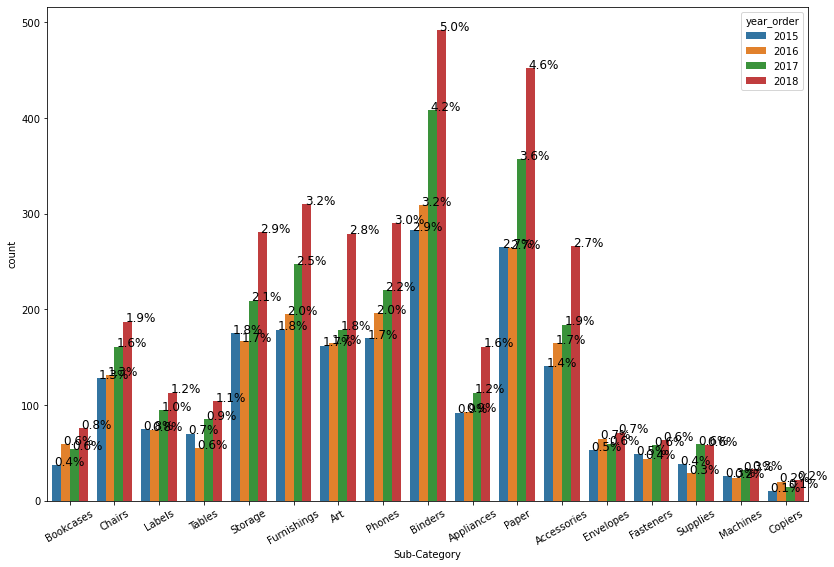

In [69]:
tipe1 = ['Sub-Category']

plt.figure(figsize=(30,20))

for i,col in enumerate(tipe1):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = df[col],hue=df['year_order'])
    ax.tick_params(axis='x', rotation=30)
    percent_data(ax,df)

In [16]:
 df.groupby(['Category','Sub-Category',]).agg(
    distinct_name = ('Product Name','nunique'),
    mean_sales = ('Sales','mean')
)

distinct_name   mean_sales
Category        Sub-Category                            
Furniture       Bookcases                50   503.598224
                Chairs                   88   531.833165
                Furnishings             186    95.823865
                Tables                   56   645.893720
Office Supplies Appliances               97   227.926804
                Art                     157    34.019631
                Binders                 211   134.067550
                Envelopes                44    65.032444
                Fasteners                34    14.027850
                Labels                   70    34.587468
                Paper                   277    57.420257
                Storage                 131   263.633885
                Supplies                 36   252.284283
Technology      Accessories             147   217.178175
                Copiers                  13  2215.880212
                Machines                 63  1645.553313
                Phones                  189   374.180877

Observation :
1. Kategori yang paling banyak dibeli adalah peralatan kantor sebanyak 60.3%
2. sub-katergori paling banyak debeli adalah jenis binder, kertas , dan furnishing

### EDAquestion

1. top 10 kota dan state penjualan terbanyak
2. top 10 kota dan state penjualan terbaik
3. top 10 produk terlaris 
4. Omzet penjuanlan perbulan, tahunan

In [17]:
#create agg for city and state
top10_City = (df
            .groupby('City')
            .agg(num_trx=('City','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            .head(10)
            )
top10_State = (df
            .groupby('State')
            .agg(num_trx1=('State','count'))
            .reset_index()
            .sort_values('num_trx1',ascending=False)
            .head(10)
            )

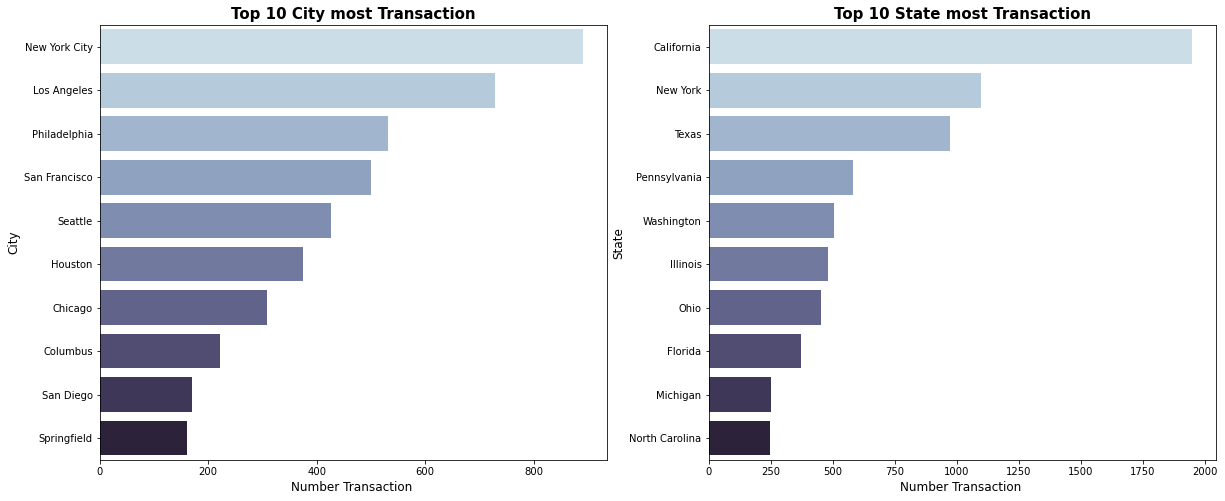

<Figure size 576x432 with 0 Axes>

In [18]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
plt.figure(figsize=(8,6))
sns.barplot(ax=axes[0], data=top10_City, y='City', x='num_trx',palette='ch:s=.25,rot=-.25')
axes[0].set_title('Top 10 City most Transaction', fontsize = 15,fontweight='bold')
axes[0].set_xlabel("Number Transaction ", fontsize = 12)
axes[0].set_ylabel("City", fontsize = 12)
sns.barplot(ax=axes[1], data=top10_State, y='State', x='num_trx1',palette='ch:s=.25,rot=-.25')
axes[1].set_title('Top 10 State most Transaction', fontsize = 15,fontweight='bold')
axes[1].set_xlabel("Number Transaction ", fontsize = 12)
axes[1].set_ylabel("State", fontsize = 12)

plt.show()

In [19]:
# group by aggregation
top10_sales_city = (df
            .groupby('City')
            .agg(total_sales=('Sales','sum'))
            .reset_index()
            .sort_values('total_sales',ascending=False)
            .head(10)
            )

top10_sales_state = (df
            .groupby('State')
            .agg(total_sales=('Sales','sum'))
            .reset_index()
            .sort_values('total_sales',ascending=False)
            .head(10)
            )

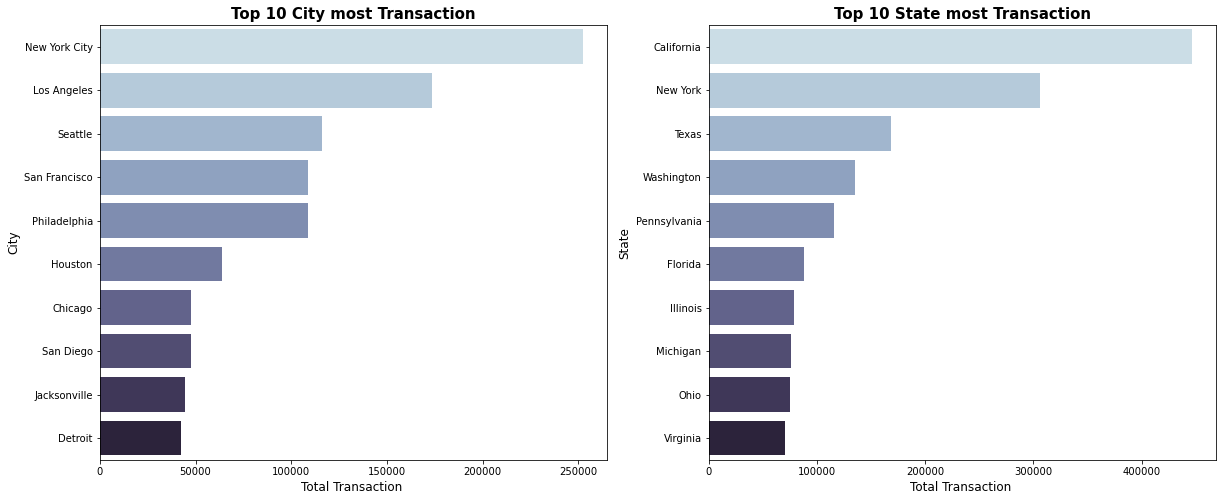

<Figure size 576x432 with 0 Axes>

In [20]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
plt.figure(figsize=(8,6))
sns.barplot(ax=axes[0], data=top10_sales_city, y='City', x='total_sales',palette='ch:s=.25,rot=-.25')
axes[0].set_title('Top 10 City most Transaction', fontsize = 15,fontweight='bold')
axes[0].set_xlabel("Total Transaction ", fontsize = 12)
axes[0].set_ylabel("City", fontsize = 12)
sns.barplot(ax=axes[1], data=top10_sales_state, y='State', x='total_sales',palette='ch:s=.25,rot=-.25')
axes[1].set_title('Top 10 State most Transaction', fontsize = 15,fontweight='bold')
axes[1].set_xlabel("Total Transaction ", fontsize = 12)
axes[1].set_ylabel("State", fontsize = 12)

plt.show()

In [21]:
top10_prod = (df
            .groupby('Product Name')
            .agg(num_prod=('Product Name','count'))
            .reset_index()
            .sort_values('num_prod',ascending=False)
            .head(10)
            )



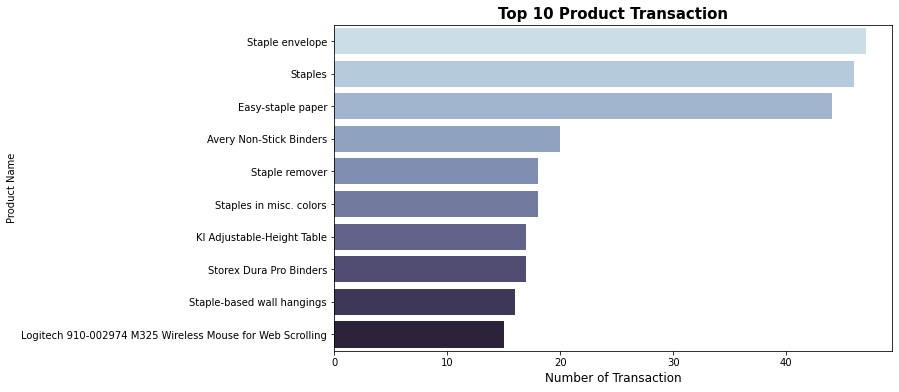

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.barplot(data=top10_prod, y='Product Name', x='num_prod',palette='ch:s=.25,rot=-.25')
ax.set_title("Top 10 Product Transaction", fontsize = 15,fontweight='bold')
ax.set_xlabel("Number of Transaction",fontsize = 12)
plt.show()

#### 4. Omzet penjuanlan perbulan, tahunan

In [25]:
# derive InvoiceMonth column
df['Month_order'] = df['Order Date'].dt.to_period('M')

In [26]:
# monthly_data
monthly_data = (df
                .groupby('Category','Month_order')
                .agg(num_buyer=('Customer ID','nunique'),
                     total_omzet=('Sales','sum'))
                .reset_index())

monthly_data['Month_order'] = monthly_data['Month_order'].astype(str) 

ValueError: No axis named Month_order for object type DataFrame

In [ ]:
# num sales progression
plt.figure(figsize=(15,8))
sns.lineplot(data=monthly_data,
             x='Month_order',
             y='total_omzet')
plt.xticks(rotation=90)

In [26]:
#create lama waktu deliver
df['Month_ship_num'] = df['Ship Date'].dt.month
df['Month_order_num'] = df['Order Date'].dt.month
df['time_deliver'] = df['Month_ship_num'] - df['Month_order_num']
df = df[df['time_deliver'] > 0]

In [27]:
#drop irrelevant colum for ML
df = df.drop(['Row ID','Order ID','Customer ID','Customer Name','Postal Code','Country','Product ID','Product Name','Month_ship_num'
             ,'Month_order_num','Sales'],axis = 1)

In [29]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']

In [31]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [32]:
for column in [object_cols]:
    df = onehot_encode(df, column=column)

In [36]:
df

,Order Date,Ship Date,Log_Of_sales,Month_order,time_deliver,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2017-08-11,2017-11-11,5.568192,2017-08,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2017-08-11,2017-11-11,6.595699,2017-08,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13,2017-05-12,2017-10-12,6.011208,2017-05,5,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
21,2017-09-12,2017-12-13,2.968361,2017-09,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22,2017-09-12,2017-12-13,4.099995,2017-09,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,2018-04-11,2018-08-11,1.458615,2018-04,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9765,2018-02-28,2018-06-03,2.286456,2018-02,4,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9766,2018-02-28,2018-06-03,2.051556,2018-02,4,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
9767,2018-09-12,2018-12-15,4.005513,2018-09,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Modelling

### Forecasting Sales

#### Split Data